Every implementation of machine learning algorithms has the same basic components. These same principles will be used in this project, viz;
- Data collection, that is defining the problem and assembling a dataset
- Data preparation
- Choose model
- Create the model
- Train model, that is developing a model that does better than a baseline
- Evaluate model, that is choosing a measure of success and deciding on an evaluation protocol
- Parameter tuning, that is regularizing the model and tuning the parameters
- Prediction

# Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sns
from scipy import stats as ss
from scipy.stats import norm
import re
import warnings;warnings.filterwarnings("ignore")

In [2]:
xdata=pd.read_csv("Cent.csv")

In [3]:
xdata.columns = ["Applied", "Gender", "Payment_Method","Area",
               "Received", "Id", "Reason", "Date", "Age", "Location","True_False"]

In [4]:
xdata.head()

Applied Gender Payment_Method Area Received            Id Reason  \
0  $775.00      F             AV    O  $775.00  GHI001721881     CR   
1  $330.00      F             AV    S  $330.00  GHI001639172     CR   
2  $204.00      M             AV    C  $204.41  GHI000923920     CR   
3  $325.00      M             AV    S  $325.00  GHI000270611     CR   
4  $325.00      M             AV    S  $325.00  GHI000270611     CR   

        Date    Age Location  True_False  
0  04-Nov-20  25-29       PP           0  
1  26-Nov-18  18-19       NE           0  
2  16-Feb-17    65+       NE           0  
3  14-Jul-17  30-34        O           0  
4  14-Jul-17  30-34        O           0

## Separating a Test Dataset and Training Dataset

#### Reason to separate:
Now we will use "data" as the training data as a whole, machine will not know about "xdata". "Xdata" will be used as a alien dataset to which the computer will predict, later we will use it to check the accuracy. It has been done to check how our model will work on real world.

In [5]:
X,Y=xdata[['Applied', 'Gender', 'Payment_Method', 'Location', 'Received', 'Id',
       'Reason', 'Date', 'Age', 'Area']],xdata[['True_False']]

In [6]:
from sklearn.model_selection import train_test_split
traindata, testdata, targetdata, testtargetdata = train_test_split(X, Y, stratify = Y, test_size=0.20, random_state=0)

In [7]:
traindata.head()

Applied Gender Payment_Method Location Received            Id Reason  \
24147  $510.00      F             RP       NE  $510.00  GHI000076584     CR   
14970  $252.00      M             AV       PP  $252.00  GHI000135471     CR   
19230  $140.00      M             AV        M  $140.00  GHI000159249     CR   
5181   $380.00      M             RP       NE  $380.00  GHI000844291     CR   
18322  $320.00      F             AV       NE  $320.00  GHI000441861     CR   

            Date    Age Area  
24147  11-Mar-19  35-39   AM  
14970  08-Apr-20  30-34    O  
19230  21-Sep-17  50-54   EC  
5181   02-Jul-18  35-39    N  
18322  30-Apr-20  20-24    T

In [8]:
traindata['Reason'].value_counts()

CR    31076
Name: Reason, dtype: int64

In [9]:
targetdata['True_False'].value_counts()

0    30721
1      355
Name: True_False, dtype: int64

In [10]:
testdata['Reason'].value_counts()

CR    7770
Name: Reason, dtype: int64

In [11]:
testtargetdata['True_False'].value_counts()

0    7681
1      89
Name: True_False, dtype: int64

In [12]:
frame=[traindata,targetdata]
data=pd.concat(frame,axis=1)
data

Applied Gender Payment_Method Location   Received            Id  \
24147    $510.00      F             RP       NE    $510.00  GHI000076584   
14970    $252.00      M             AV       PP    $252.00  GHI000135471   
19230    $140.00      M             AV        M    $140.00  GHI000159249   
5181     $380.00      M             RP       NE    $380.00  GHI000844291   
18322    $320.00      F             AV       NE    $320.00  GHI000441861   
...          ...    ...            ...      ...        ...           ...   
33090  $1,520.00      F             AV       NE  $1,520.00  GHI000140573   
1392     $721.00      F             AV       NE    $721.00  GHI000184125   
15931    $640.00      M             RP        M    $640.00  GHI000084252   
6688     $380.00      M             AV        M    $380.01  GHI000083247   
10537    $800.00      M             RP       NE    $800.00  GHI000088447   

      Reason       Date    Age Area  True_False  
24147     CR  11-Mar-19  35-39   AM           0  
14970     CR  08-Apr-20  30-34    O           0  
19230     CR  21-Sep-17  50-54   EC           0  
5181      CR  02-Jul-18  35-39    N           0  
18322     CR  30-Apr-20  20-24    T           0  
...      ...        ...    ...  ...         ...  
33090     CR  30-Jul-18  50-54   AM           0  
1392      CR  04-Apr-17  30-34    C           0  
15931     CR  09-Jul-19  50-54   AM           0  
6688      CR  09-Jan-18    65+    O           0  
10537     CR  11-Jan-18  35-39    W           0  

[31076 rows x 11 columns]

In [13]:
frame=[testdata,testtargetdata]
datax=pd.concat(frame,axis=1)
datax

Applied Gender Payment_Method Location   Received            Id  \
22830    $625.00      F             AV       PP    $625.00  GHI001712135   
32835    $460.00      F             AV        M    $460.00  GHI000140573   
163      $360.00      M             AV        M    $360.00  GHI001357314   
2844     $780.00      M             AV       NE    $780.00  GHI001588756   
21742    $200.00      M             AV        M    $200.00  GHI000075311   
...          ...    ...            ...      ...        ...           ...   
19719  $1,000.00      F             AV       NE  $1,000.00  GHI001763083   
9897     $400.00      F             AV        M    $400.00  GHI001260818   
11340    $697.00      F             AV        M    $696.75  GHI001486088   
5892     $300.00      F             AV        M    $300.00  GHI000380221   
36771    $625.00      F             AV        M    $625.00  GHI000185631   

      Reason       Date    Age Area  True_False  
22830     CR  30-Apr-19  40-44   AM           0  
32835     CR  12-Nov-18  25-29   AM           0  
163       CR  13-Dec-18  50-54    O           0  
2844      CR  20-Aug-18  60-64    T           0  
21742     CR  08-Aug-18  25-29   NL           0  
...      ...        ...    ...  ...         ...  
19719     CR  23-Jul-19  25-29    C           0  
9897      CR  04-Dec-17  60-64   AM           0  
11340     CR  06-Nov-18  45-49    T           0  
5892      CR  30-Jun-17  25-29   NL           0  
36771     CR  28-Jan-20  35-39   AM           0  

[7770 rows x 11 columns]

In [14]:
datax.to_csv("Car_Rent_Testset.csv")

In [15]:
data.to_csv("Car_Rent_Trainingset.csv")

# Data Preparation and Feature Engineering
## Adding and Cleaning columns
##### Removing special characters and converting to continous values 

In [16]:
data=pd.read_csv("Car_Rent_Trainingset.csv")

In [17]:
data=data.drop("Unnamed: 0",axis=1)

In [18]:
data.tail()

Applied Gender Payment_Method Location   Received            Id  \
31071  $1,520.00      F             AV       NE  $1,520.00  GHI000140573   
31072    $721.00      F             AV       NE    $721.00  GHI000184125   
31073    $640.00      M             RP        M    $640.00  GHI000084252   
31074    $380.00      M             AV        M    $380.01  GHI000083247   
31075    $800.00      M             RP       NE    $800.00  GHI000088447   

      Reason       Date    Age Area  True_False  
31071     CR  30-Jul-18  50-54   AM           0  
31072     CR  04-Apr-17  30-34    C           0  
31073     CR  09-Jul-19  50-54   AM           0  
31074     CR  09-Jan-18    65+    O           0  
31075     CR  11-Jan-18  35-39    W           0

In [19]:
data['Applied']=data['Applied'].replace(r'',np.NaN)
data.dropna()
data['Applied']=data['Applied'].replace('[A-Z a-z , / ? \ : " ; $]','' ,regex=True)
data['Applied']=data['Applied'].astype(float)

data['Received']=data['Received'].replace(r'',np.NaN)
data.dropna()

data['Received']=data['Received'].replace('[A-Z a-z , / ? \ : " ; $]','' ,regex=True)
data['Received']=data['Received'].astype(float)

In [20]:
data['Payment_Method'].value_counts()

AV    26795
RP     4281
Name: Payment_Method, dtype: int64

In [21]:
data["Age"].unique()

array(['35-39', '30-34', '50-54', '20-24', '60-64', '25-29', '65+',
       '45-49', '18-19', '55-59', '40-44', '17', '16'], dtype=object)

In [22]:
mapper = {"16" : "Teenage", "17" : "Teenage", "18-19" : "Adult", "20-24": "Adult",
          "25-29" : "Adult", "30-34" : "MidAge", "35-39" : "MidAge", "40-44" : "MidAge",
          "45-49" : "MidAge", "50-54" : "Old", "55-59" : "Old", "60-64" : "Old", "65+":"Old"}
#Decrease number of age groups as it may decrease our accuracy in classification model.

In [23]:
data["AgeGroup"] = data["Age"].map(mapper)

In [24]:
pmapper = {"AV":"AV","RP":"RPU", "U":"RPU"}

In [25]:
data["Payment_Type"] = data["Payment_Method"].map(pmapper)

In [26]:
data["logapplied"] = pd.Series(np.log(data["Applied"]), index = data.index)
data["logreceived"] = pd.Series(np.log(data["Received"]), index = data.index)

In [27]:
data["Ratio"] = data["Received"]/data["Applied"]

In [28]:
'''
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Day']= pd.DatetimeIndex(data['Date']).day
data['Week_Of_Month']= data['Date'].apply(lambda d: (d.day-1)//7+1)
data['Week_Of_Year']= pd.DatetimeIndex(data['Date']).weekofyear
'''

"\ndata['Date'] = pd.to_datetime(data['Date'], errors='coerce')\ndata['Year'] = pd.DatetimeIndex(data['Date']).year\ndata['Month'] = pd.DatetimeIndex(data['Date']).month\ndata['Day']= pd.DatetimeIndex(data['Date']).day\ndata['Week_Of_Month']= data['Date'].apply(lambda d: (d.day-1)//7+1)\ndata['Week_Of_Year']= pd.DatetimeIndex(data['Date']).weekofyear\n"

In [29]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

## Checking details of dataset
#### Preliminary Data Analysis

In [30]:
data.head()

Applied Gender Payment_Method Location  Received            Id Reason  \
0    510.0      F             RP       NE     510.0  GHI000076584     CR   
1    252.0      M             AV       PP     252.0  GHI000135471     CR   
2    140.0      M             AV        M     140.0  GHI000159249     CR   
3    380.0      M             RP       NE     380.0  GHI000844291     CR   
4    320.0      F             AV       NE     320.0  GHI000441861     CR   

        Date    Age Area  True_False AgeGroup Payment_Type  logapplied  \
0  11-Mar-19  35-39   AM           0   MidAge          RPU    6.234411   
1  08-Apr-20  30-34    O           0   MidAge           AV    5.529429   
2  21-Sep-17  50-54   EC           0      Old           AV    4.941642   
3  02-Jul-18  35-39    N           0   MidAge          RPU    5.940171   
4  30-Apr-20  20-24    T           0    Adult           AV    5.768321   

   logreceived  Ratio  
0     6.234411    1.0  
1     5.529429    1.0  
2     4.941642    1.0  
3     5.940171    1.0  
4     5.768321    1.0

In [31]:
add_datepart(data, "Date")

In [32]:
data.isnull().sum() #checking if there is any null column

Applied             0
Gender              0
Payment_Method      0
Location            0
Received            0
Id                  0
Reason              0
Age                 0
Area                0
True_False          0
AgeGroup            0
Payment_Type        0
logapplied          0
logreceived         0
Ratio               0
Year                0
Month               0
Week                0
Day                 0
Dayofweek           0
Dayofyear           0
Is_month_end        0
Is_month_start      0
Is_quarter_end      0
Is_quarter_start    0
Is_year_end         0
Is_year_start       0
Elapsed             0
dtype: int64

In [33]:
data.info() #details about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31076 entries, 0 to 31075
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Applied           31076 non-null  float64
 1   Gender            31076 non-null  object 
 2   Payment_Method    31076 non-null  object 
 3   Location          31076 non-null  object 
 4   Received          31076 non-null  float64
 5   Id                31076 non-null  object 
 6   Reason            31076 non-null  object 
 7   Age               31076 non-null  object 
 8   Area              31076 non-null  object 
 9   True_False        31076 non-null  int64  
 10  AgeGroup          31076 non-null  object 
 11  Payment_Type      31076 non-null  object 
 12  logapplied        31076 non-null  float64
 13  logreceived       31076 non-null  float64
 14  Ratio             31076 non-null  float64
 15  Year              31076 non-null  int64  
 16  Month             31076 non-null  int64 

In [34]:
data.describe()

Applied      Received    True_False    logapplied   logreceived  \
count  31076.000000  31076.000000  31076.000000  31076.000000  31076.000000   
mean     771.348565    771.335225      0.011424      6.345708      6.345670   
std      607.652693    607.652243      0.106271      0.811796      0.811851   
min        3.000000      2.600000      0.000000      1.098612      0.955511   
25%      330.000000    330.000000      0.000000      5.799093      5.799093   
50%      560.000000    560.000000      0.000000      6.327937      6.327937   
75%     1050.000000   1050.000000      0.000000      6.956545      6.956545   
max    13942.000000  13941.500000      1.000000      9.542661      9.542625   

              Ratio          Year         Month          Week           Day  \
count  31076.000000  31076.000000  31076.000000  31076.000000  31076.000000   
mean       0.999962   2018.473742      6.731079     27.617551     15.849852   
std        0.000942      1.146088      3.363299     14.625749      8.601931   
min        0.866667   2016.000000      1.000000      1.000000      1.000000   
25%        1.000000   2017.000000      4.000000     15.000000      9.000000   
50%        1.000000   2019.000000      7.000000     28.000000     16.000000   
75%        1.000000   2019.000000     10.000000     40.000000     23.000000   
max        1.030000   2020.000000     12.000000     52.000000     31.000000   

          Dayofweek     Dayofyear       Elapsed  
count  31076.000000  31076.000000  3.107600e+04  
mean       2.100753    189.589297  1.545997e+09  
std        1.419840    102.419394  3.670055e+07  
min        0.000000      3.000000  1.480550e+09  
25%        1.000000    101.000000  1.513901e+09  
50%        2.000000    193.000000  1.546906e+09  
75%        3.000000    276.000000  1.576627e+09  
max        5.000000    365.000000  1.606694e+09

#### From Preliminary Data Analysis we can se there is no null value so there is no need to impute values
#### But we found there is a huge difference in standard deviation and median, also difference between 25%, 50%, 75% percentile is also large, so it seems Outliers can be present in the data.

In [35]:
#Printing some outliers
data[(data.Applied>np.percentile(data.Applied,[99])[0])]

Applied Gender Payment_Method Location  Received            Id Reason  \
46      3075.0      F             AV        M   3075.00  GHI000151115     CR   
56      3475.0      F             AV        M   3474.75  GHI000238920     CR   
178     3260.0      F             AV        O   3259.50  GHI000844803     CR   
249     3500.0      F             AV        M   3500.00  GHI001558278     CR   
369     2700.0      F             AV        M   2700.00  GHI000138501     CR   
...        ...    ...            ...      ...       ...           ...    ...   
30367   3900.0      F             AV        M   3900.00  GHI001892108     CR   
30381   7031.0      M             AV        U   7031.36  GHI000808207     CR   
30932   3850.0      F             AV        M   3850.00  GHI000881664     CR   
30958   2720.0      F             AV       PP   2720.00  GHI000199693     CR   
31038   2700.0      F             AV       PP   2700.00  GHI001042695     CR   

         Age Area  True_False  ... Day Dayofweek  Dayofyear  Is_month_end  \
46     25-29   AM           0  ...  14         2         45         False   
56     20-24   AM           0  ...  15         1        135         False   
178    20-24   AM           0  ...  22         3         81         False   
249    50-54   AM           0  ...   2         1        275         False   
369    30-34   AM           0  ...  21         4        172         False   
...      ...  ...         ...  ...  ..       ...        ...           ...   
30367  25-29   AM           0  ...  20         3         51         False   
30381  30-34   AM           0  ...   7         3        128         False   
30932  35-39   AM           1  ...  25         3        206         False   
30958  25-29   AM           0  ...  20         0        202         False   
31038  45-49   AM           0  ...   6         0        126         False   

       Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
46              False           False             False        False   
56              False           False             False        False   
178             False           False             False        False   
249             False           False             False        False   
369             False           False             False        False   
...               ...             ...               ...          ...   
30367           False           False             False        False   
30381           False           False             False        False   
30932           False           False             False        False   
30958           False           False             False        False   
31038           False           False             False        False   

       Is_year_start     Elapsed  
46             False  1518566400  
56             False  1526342400  
178            False  1521676800  
249            False  1538438400  
369            False  1561075200  
...              ...         ...  
30367          False  1582156800  
30381          False  1588809600  
30932          False  1564012800  
30958          False  1595203200  
31038          False  1557100800  

[308 rows x 28 columns]

In [36]:
#saving the outliers in a excel file to check the outliers
data[(data.Applied>np.percentile(data.Applied,[99])[0])].to_excel("outliers_tent.xlsx")

#### Conclusion: From Preliminary data analysis we found most of the outliers weren't fraud. So it is dificult to find a thresold value of being fraud.

# Exploratory Data Analysis

## Pandas Profiling

In [37]:
from pandas_profiling import ProfileReport

In [38]:
profile = ProfileReport(data, title="Pandas Profiling Report")

In [39]:
profile.to_file("Profiling_report.html") #Saving the report in a html file

In [40]:
profile 

### Checking Correlation using Cramer's V rule
Checking correletion of each columns with the target columns
and also checking correlation of with each other

In [41]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [42]:
lst=[]
lst.clear()

In [43]:
cols = list(data.columns)

In [44]:
cols.remove("True_False")

In [45]:
print(cols)
for col in cols:
    confusion_matrix = pd.crosstab(data[col], data['True_False']).to_numpy()
    lst.append(cramers_v(confusion_matrix)*100)
    print(cramers_v(confusion_matrix)*100)

['Applied', 'Gender', 'Payment_Method', 'Location', 'Received', 'Id', 'Reason', 'Age', 'Area', 'AgeGroup', 'Payment_Type', 'logapplied', 'logreceived', 'Ratio', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed']
27.563730873963827
2.599113377983368
1.1313444641478587
4.581383453835156
26.20623901493966
93.64329867922504
nan
2.9399354125717756
8.184893238609469
1.9077796360691246
1.1313444641478587
27.563730873963827
26.20623901493966
14.414713417809985
6.635668893274374
4.1818968510502526
4.763322475404898
0.9787856244835034
1.4562927489619453
7.886575534857891
0.0
0.0
0.0
0.43868458243412295
2.0746083193312503
nan
13.833454723297653


In [46]:
#split the cells below if you want to get values of each column separately
'''
confusion_matrix = pd.crosstab(data['Gender'], data['True_False']).to_numpy()
cramers_v(confusion_matrix)*100
#Gender cannot be used in our model, though gender is 4.82% is correlated with our target, as our model can be gender biased and it also least import column

confusion_matrix = pd.crosstab(data['Payment_Method'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Area'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Received'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Id'], data['True_False']).to_numpy()
cramers_v(confusion_matrix)*100
#It is because if a person is declared as fraud his/her all transaction are marked as fraud. So "Id" is not needed in our trainning model.

confusion_matrix = pd.crosstab(data['Reason'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Age'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Location'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Date'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Year'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Month'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Day'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Week_Of_Month'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Week_Of_Year'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100
'''

'\nconfusion_matrix = pd.crosstab(data[\'Gender\'], data[\'True_False\']).to_numpy()\ncramers_v(confusion_matrix)*100\n#Gender cannot be used in our model, though gender is 4.82% is correlated with our target, as our model can be gender biased and it also least import column\n\nconfusion_matrix = pd.crosstab(data[\'Payment_Method\'], data[\'True_False\']).to_numpy()\nlst.append(cramers_v(confusion_matrix)*100)\ncramers_v(confusion_matrix)*100\n\nconfusion_matrix = pd.crosstab(data[\'Area\'], data[\'True_False\']).to_numpy()\nlst.append(cramers_v(confusion_matrix)*100)\ncramers_v(confusion_matrix)*100\n\nconfusion_matrix = pd.crosstab(data[\'Received\'], data[\'True_False\']).to_numpy()\nlst.append(cramers_v(confusion_matrix)*100)\ncramers_v(confusion_matrix)*100\n\nconfusion_matrix = pd.crosstab(data[\'Id\'], data[\'True_False\']).to_numpy()\ncramers_v(confusion_matrix)*100\n#It is because if a person is declared as fraud his/her all transaction are marked as fraud. So "Id" is not need

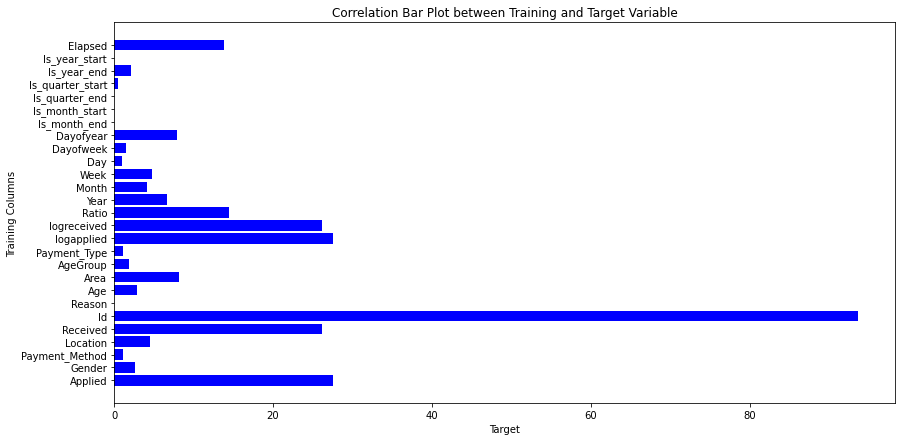

In [47]:
fig=pl.figure(figsize=(14,7))
pl.barh(cols,lst,color='b')
pl.ylabel("Training Columns")
pl.xlabel("Target")
pl.title("Correlation Bar Plot between Training and Target Variable")
pl.show()

### Correlation plot of each column with each other
##### The image has been cropped and import from the pandas profiling

In [51]:
from IPython.display import Image
Image(filename="Cramer'sV.PNG")

FileNotFoundError: [Errno 2] No such file or directory: "Cramer'sV.PNG"

#### Checking Bias in target data

In [48]:
data['True_False'].value_counts()

0    30721
1      355
Name: True_False, dtype: int64

In [49]:
data1=data.copy()

In [50]:
#del data1['Date']
del data1['Gender']
del data1['Id']
del data1['Applied']
del data1['Received']
del data1['Age']
del data1['Reason']
del data1['Payment_Method']
## Removed highly correlated KPIS
#del data1["Week_Of_Month"]
#del data1["Week_Of_Year"]
del data1['logreceived']
del data1['Ratio']
del data1['Dayofweek']
#del data1['Dayofyear']
del data1['Is_month_end']
del data1['Is_month_start']
del data1['Is_quarter_end']
del data1['Is_quarter_start']
del data1['Is_year_end']
del data1['Is_year_start']

### Getting dummy variables

In [51]:
dataf=data1.copy()

In [52]:
data1

Location Area  True_False AgeGroup Payment_Type  logapplied  Year  \
0           NE   AM           0   MidAge          RPU    6.234411  2019   
1           PP    O           0   MidAge           AV    5.529429  2020   
2            M   EC           0      Old           AV    4.941642  2017   
3           NE    N           0   MidAge          RPU    5.940171  2018   
4           NE    T           0    Adult           AV    5.768321  2020   
...        ...  ...         ...      ...          ...         ...   ...   
31071       NE   AM           0      Old           AV    7.326466  2018   
31072       NE    C           0   MidAge           AV    6.580639  2017   
31073        M   AM           0      Old          RPU    6.461468  2019   
31074        M    O           0      Old           AV    5.940171  2018   
31075       NE    W           0   MidAge          RPU    6.684612  2018   

       Month  Week  Day  Dayofyear     Elapsed  
0          3    11   11         70  1552262400  
1          4    15    8         99  1586304000  
2          9    38   21        264  1505952000  
3          7    27    2        183  1530489600  
4          4    18   30        121  1588204800  
...      ...   ...  ...        ...         ...  
31071      7    31   30        211  1532908800  
31072      4    14    4         94  1491264000  
31073      7    28    9        190  1562630400  
31074      1     2    9          9  1515456000  
31075      1     2   11         11  1515628800  

[31076 rows x 12 columns]

In [53]:
data1["Location"].unique()

array(['NE', 'PP', 'M', 'O', 'U'], dtype=object)

In [54]:
dataf=pd.get_dummies(dataf,drop_first=True)

In [55]:
dataf

True_False  logapplied  Year  Month  Week  Day  Dayofyear     Elapsed  \
0               0    6.234411  2019      3    11   11         70  1552262400   
1               0    5.529429  2020      4    15    8         99  1586304000   
2               0    4.941642  2017      9    38   21        264  1505952000   
3               0    5.940171  2018      7    27    2        183  1530489600   
4               0    5.768321  2020      4    18   30        121  1588204800   
...           ...         ...   ...    ...   ...  ...        ...         ...   
31071           0    7.326466  2018      7    31   30        211  1532908800   
31072           0    6.580639  2017      4    14    4         94  1491264000   
31073           0    6.461468  2019      7    28    9        190  1562630400   
31074           0    5.940171  2018      1     2    9          9  1515456000   
31075           0    6.684612  2018      1     2   11         11  1515628800   

       Location_NE  Location_O  ...  Area_NL  Area_O  Area_S  Area_T  Area_W  \
0                1           0  ...        0       0       0       0       0   
1                0           0  ...        0       1       0       0       0   
2                0           0  ...        0       0       0       0       0   
3                1           0  ...        0       0       0       0       0   
4                1           0  ...        0       0       0       1       0   
...            ...         ...  ...      ...     ...     ...     ...     ...   
31071            1           0  ...        0       0       0       0       0   
31072            1           0  ...        0       0       0       0       0   
31073            0           0  ...        0       0       0       0       0   
31074            0           0  ...        0       1       0       0       0   
31075            1           0  ...        0       0       0       0       1   

       Area_Wlg  AgeGroup_MidAge  AgeGroup_Old  AgeGroup_Teenage  \
0             0                1             0                 0   
1             0                1             0                 0   
2             0                0             1                 0   
3             0                1             0                 0   
4             0                0             0                 0   
...         ...              ...           ...               ...   
31071         0                0             1                 0   
31072         0                1             0                 0   
31073         0                0             1                 0   
31074         0                0             1                 0   
31075         0                1             0                 0   

       Payment_Type_RPU  
0                     1  
1                     0  
2                     0  
3                     1  
4                     0  
...                 ...  
31071                 0  
31072                 0  
31073                 1  
31074                 0  
31075                 1  

[31076 rows x 26 columns]

# Creating the model

## Test Train Split

In [56]:
dataf.columns

Index(['True_False', 'logapplied', 'Year', 'Month', 'Week', 'Day', 'Dayofyear',
       'Elapsed', 'Location_NE', 'Location_O', 'Location_PP', 'Location_U',
       'Area_BP', 'Area_C', 'Area_EC', 'Area_N', 'Area_NL', 'Area_O', 'Area_S',
       'Area_T', 'Area_W', 'Area_Wlg', 'AgeGroup_MidAge', 'AgeGroup_Old',
       'AgeGroup_Teenage', 'Payment_Type_RPU'],
      dtype='object')

In [57]:
X1, y1 = dataf.drop(["True_False"],axis =1),dataf[['True_False']]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, stratify = y1, test_size=0.20, random_state=0)

In [59]:
X1

logapplied  Year  Month  Week  Day  Dayofyear     Elapsed  Location_NE  \
0        6.234411  2019      3    11   11         70  1552262400            1   
1        5.529429  2020      4    15    8         99  1586304000            0   
2        4.941642  2017      9    38   21        264  1505952000            0   
3        5.940171  2018      7    27    2        183  1530489600            1   
4        5.768321  2020      4    18   30        121  1588204800            1   
...           ...   ...    ...   ...  ...        ...         ...          ...   
31071    7.326466  2018      7    31   30        211  1532908800            1   
31072    6.580639  2017      4    14    4         94  1491264000            1   
31073    6.461468  2019      7    28    9        190  1562630400            0   
31074    5.940171  2018      1     2    9          9  1515456000            0   
31075    6.684612  2018      1     2   11         11  1515628800            1   

       Location_O  Location_PP  ...  Area_NL  Area_O  Area_S  Area_T  Area_W  \
0               0            0  ...        0       0       0       0       0   
1               0            1  ...        0       1       0       0       0   
2               0            0  ...        0       0       0       0       0   
3               0            0  ...        0       0       0       0       0   
4               0            0  ...        0       0       0       1       0   
...           ...          ...  ...      ...     ...     ...     ...     ...   
31071           0            0  ...        0       0       0       0       0   
31072           0            0  ...        0       0       0       0       0   
31073           0            0  ...        0       0       0       0       0   
31074           0            0  ...        0       1       0       0       0   
31075           0            0  ...        0       0       0       0       1   

       Area_Wlg  AgeGroup_MidAge  AgeGroup_Old  AgeGroup_Teenage  \
0             0                1             0                 0   
1             0                1             0                 0   
2             0                0             1                 0   
3             0                1             0                 0   
4             0                0             0                 0   
...         ...              ...           ...               ...   
31071         0                0             1                 0   
31072         0                1             0                 0   
31073         0                0             1                 0   
31074         0                0             1                 0   
31075         0                1             0                 0   

       Payment_Type_RPU  
0                     1  
1                     0  
2                     0  
3                     1  
4                     0  
...                 ...  
31071                 0  
31072                 0  
31073                 1  
31074                 0  
31075                 1  

[31076 rows x 25 columns]

In [60]:
X1.columns

Index(['logapplied', 'Year', 'Month', 'Week', 'Day', 'Dayofyear', 'Elapsed',
       'Location_NE', 'Location_O', 'Location_PP', 'Location_U', 'Area_BP',
       'Area_C', 'Area_EC', 'Area_N', 'Area_NL', 'Area_O', 'Area_S', 'Area_T',
       'Area_W', 'Area_Wlg', 'AgeGroup_MidAge', 'AgeGroup_Old',
       'AgeGroup_Teenage', 'Payment_Type_RPU'],
      dtype='object')

In [61]:
from sklearn .preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [62]:
import pickle
filename = 'scaler1.sav'
pickle.dump(sc, open(filename, 'wb'))

## Smote
###### Since there is a high difference in data we have to balance the dataset using smote

In [63]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

0.8.0


In [64]:
dataf.columns

Index(['True_False', 'logapplied', 'Year', 'Month', 'Week', 'Day', 'Dayofyear',
       'Elapsed', 'Location_NE', 'Location_O', 'Location_PP', 'Location_U',
       'Area_BP', 'Area_C', 'Area_EC', 'Area_N', 'Area_NL', 'Area_O', 'Area_S',
       'Area_T', 'Area_W', 'Area_Wlg', 'AgeGroup_MidAge', 'AgeGroup_Old',
       'AgeGroup_Teenage', 'Payment_Type_RPU'],
      dtype='object')

In [65]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train,y_train)

In [66]:
type(X_train)

numpy.ndarray

In [67]:
y_train['True_False'].value_counts()

1    24576
0    24576
Name: True_False, dtype: int64

In [68]:
y_test['True_False'].value_counts()

0    6145
1      71
Name: True_False, dtype: int64

# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

In [70]:
y_pred=clf.predict(X_test)

In [71]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.67      0.80      6145
     class 1       0.02      0.72      0.05        71

    accuracy                           0.67      6216
   macro avg       0.51      0.69      0.42      6216
weighted avg       0.98      0.67      0.79      6216



In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4092 2053]
 [  20   51]]


0.6665057915057915

#### After Parameter Tuning using Grid Search CV

In [73]:
from sklearn.model_selection import GridSearchCV
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

lr = LogisticRegression(random_state = 5,max_iter=2000,solver='lbfgs',class_weight={0:1, 1:10})
classifier=GridSearchCV(lr,grid_values,cv=10,n_jobs = 4, verbose = 2)
classifier.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight={0: 1, 1: 10},
                                          max_iter=2000, random_state=5),
             n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             verbose=2)

In [74]:
print("tuned hpyerparameters :(best parameters) ",classifier.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 100, 'penalty': 'l2'}


In [75]:
print("accuracy :",classifier.best_score_)

accuracy : 0.6746826067558586


In [76]:
classifier2=LogisticRegression(C=1,penalty="l2",random_state = 5,max_iter=2000, class_weight={0:1, 1:10},solver='lbfgs')
classifier2.fit(X_train,y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 10}, max_iter=2000,
                   random_state=5)

In [77]:
y_pred1 = classifier2.predict(X_test)

In [78]:
y_pred_probability=classifier2.predict_proba(X_test)
y_pred_probability

array([[0.163109  , 0.836891  ],
       [0.08108879, 0.91891121],
       [0.21565315, 0.78434685],
       ...,
       [0.52457755, 0.47542245],
       [0.20716947, 0.79283053],
       [0.89517597, 0.10482403]])

In [79]:
y_pred_probability[:,1]>0.4

array([ True,  True,  True, ...,  True,  True, False])

In [80]:
new_pred=y_pred_probability[:,1]>0.6

In [81]:
print(classification_report(y_test, new_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.39      0.56      6145
     class 1       0.02      0.99      0.04        71

    accuracy                           0.40      6216
   macro avg       0.51      0.69      0.30      6216
weighted avg       0.99      0.40      0.55      6216



In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, new_pred)
print(cm)
accuracy_score(y_test, new_pred)*100

[[2392 3753]
 [   1   70]]


39.60746460746461

In [83]:
d = y_test.copy()
d["lr_pred"] = pd.Series(new_pred, index = y_test.index)

In [84]:
d[(d["True_False"] == 0) & (d["lr_pred"] == 0)]

True_False  lr_pred
16249           0    False
19184           0    False
9723            0    False
20183           0    False
10205           0    False
...           ...      ...
8083            0    False
20807           0    False
27750           0    False
12601           0    False
10898           0    False

[2392 rows x 2 columns]

#### Feature Importance

In [89]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: eli5 in c:\users\deban\anaconda3\lib\site-packages (0.11.0)



In [85]:
import eli5
from eli5.sklearn import PermutationImportance

In [86]:
perm = PermutationImportance(classifier2).fit(X_test, y_test)
eli5.show_weights(perm)

In [87]:
perm.feature_importances_

array([ 0.00447233, -0.04903475, -0.15148005, -0.00456885, -0.03143501,
       -0.14658945, -0.04662162,  0.00540541, -0.00312098, -0.00331403,
        0.00119048,  0.00138353,  0.01435006,  0.00859073,  0.00707851,
        0.01361004, -0.00157658,  0.01052124,  0.01190476,  0.01164736,
        0.00743243, -0.00112613, -0.00032175,  0.00083655, -0.0041184 ])

In [88]:
fi = pd.DataFrame(data = perm.feature_importances_, index = X1.columns)

In [89]:
# Removing Location_NE, Applied, Age_17, Is_month_end, Is_year_end, Is_quarter_end, Is_quarter_start should improve the results

In [90]:
fi.sort_values(by = 0)

0
Month            -0.151480
Dayofyear        -0.146589
Year             -0.049035
Elapsed          -0.046622
Day              -0.031435
Week             -0.004569
Payment_Type_RPU -0.004118
Location_PP      -0.003314
Location_O       -0.003121
Area_O           -0.001577
AgeGroup_MidAge  -0.001126
AgeGroup_Old     -0.000322
AgeGroup_Teenage  0.000837
Location_U        0.001190
Area_BP           0.001384
logapplied        0.004472
Location_NE       0.005405
Area_N            0.007079
Area_Wlg          0.007432
Area_EC           0.008591
Area_S            0.010521
Area_W            0.011647
Area_T            0.011905
Area_NL           0.013610
Area_C            0.014350

Feature: 0, Score: 0.63631
Feature: 1, Score: 0.77652
Feature: 2, Score: 7.50293
Feature: 3, Score: -0.57332
Feature: 4, Score: 0.71780
Feature: 5, Score: -7.04498
Feature: 6, Score: -0.81814
Feature: 7, Score: -0.43587
Feature: 8, Score: -0.24265
Feature: 9, Score: -0.08063
Feature: 10, Score: -0.33821
Feature: 11, Score: -0.43960
Feature: 12, Score: -0.70154
Feature: 13, Score: -1.60114
Feature: 14, Score: -1.28742
Feature: 15, Score: -0.83868
Feature: 16, Score: -0.00536
Feature: 17, Score: -1.65278
Feature: 18, Score: -1.66605
Feature: 19, Score: -0.72888
Feature: 20, Score: -0.53167
Feature: 21, Score: 0.14058
Feature: 22, Score: -0.09838
Feature: 23, Score: -0.49171
Feature: 24, Score: -0.31472


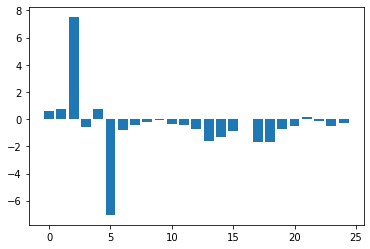

In [91]:
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pl.bar([x for x in range(len(importance))], importance)
pl.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.759


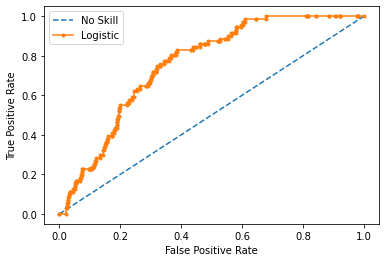

In [92]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_probability[:,1]
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[lr_probs>0]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pl.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pl.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
# show the legend
pl.legend()
# show the plot
pl.show()

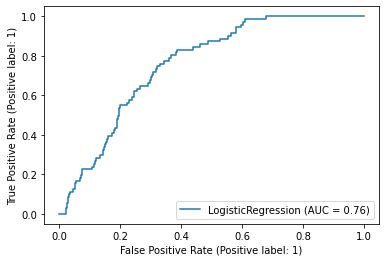

In [93]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier2,X_test,y_test)

#### Saving the model to use later

In [94]:
import pickle
filename = 'LR_trained_model.sav'
pickle.dump(classifier2, open(filename, 'wb'))

# Decision Tree Classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=0, class_weight = {1:100, 0:1}).fit(X_train, y_train)

In [96]:
y_pred_dt=clf_DT.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_dt, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      0.98      0.99      6145
     class 1       0.13      0.21      0.16        71

    accuracy                           0.97      6216
   macro avg       0.56      0.60      0.57      6216
weighted avg       0.98      0.97      0.98      6216



In [97]:
from sklearn.model_selection import GridSearchCV
params={'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}
dct = DecisionTreeClassifier(random_state = 5, class_weight = {1:100, 0:1})
classifier3=GridSearchCV(dct,params,verbose=1,cv=3, n_jobs=4)
classifier3.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 100},
                                              random_state=5),
             n_jobs=4,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [98]:
print("tuned hyperparameters :(best parameters) ",classifier3.best_estimator_)

tuned hyperparameters :(best parameters)  DecisionTreeClassifier(class_weight={0: 1, 1: 100}, max_leaf_nodes=99,
                       random_state=5)


In [99]:
classifier3.best_params_

{'max_leaf_nodes': 99, 'min_samples_split': 2}

In [100]:
classifier4=DecisionTreeClassifier(max_leaf_nodes=classifier3.best_params_['max_leaf_nodes'],
                                   min_samples_split = classifier3.best_params_['min_samples_split'], 
                                   random_state=5, class_weight = {1:100, 0:1})
classifier4.fit(X_train, y_train)        

DecisionTreeClassifier(class_weight={0: 1, 1: 100}, max_leaf_nodes=99,
                       random_state=5)

In [101]:
y_pred_dt2=classifier4.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_dt2, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.67      0.80      6145
     class 1       0.03      0.86      0.06        71

    accuracy                           0.67      6216
   macro avg       0.51      0.76      0.43      6216
weighted avg       0.99      0.67      0.79      6216



##### Feature Importances

Feature: 0, Score: 10.6410
Feature: 1, Score: 3.5065
Feature: 2, Score: 4.8076
Feature: 3, Score: 2.8481
Feature: 4, Score: 13.7731
Feature: 5, Score: 8.5835
Feature: 6, Score: 13.6207
Feature: 7, Score: 3.4844
Feature: 8, Score: 0.8536
Feature: 9, Score: 1.5041
Feature: 10, Score: 1.4139
Feature: 11, Score: 0.4594
Feature: 12, Score: 1.2321
Feature: 13, Score: 3.6161
Feature: 14, Score: 2.0168
Feature: 15, Score: 3.8999
Feature: 16, Score: 6.0528
Feature: 17, Score: 4.1676
Feature: 18, Score: 3.9935
Feature: 19, Score: 0.7670
Feature: 20, Score: 1.8783
Feature: 21, Score: 3.1554
Feature: 22, Score: 2.0709
Feature: 23, Score: 0.1835
Feature: 24, Score: 1.4700


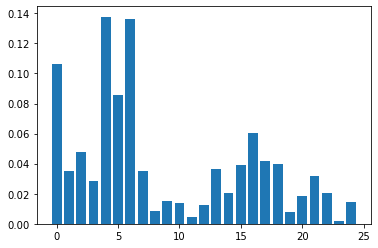

In [102]:
from matplotlib import pyplot
importance = clf_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.4f' % (i,v*100))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [103]:
perm = PermutationImportance(classifier4).fit(X_test, y_test)
eli5.show_weights(perm)

In [104]:
fi = pd.DataFrame(data = perm.feature_importances_, index = X1.columns)

In [105]:
fi.sort_values(by = 0)

0
Year             -0.007175
Day              -0.000869
Elapsed          -0.000772
logapplied       -0.000708
AgeGroup_Old     -0.000290
AgeGroup_Teenage -0.000161
Location_U        0.000740
AgeGroup_MidAge   0.000965
Area_BP           0.000965
Area_S            0.000997
Location_O        0.001062
Month             0.001158
Week              0.001834
Location_PP       0.002606
Dayofyear         0.002671
Location_NE       0.003153
Payment_Type_RPU  0.003958
Area_N            0.004151
Area_Wlg          0.004344
Area_EC           0.004891
Area_O            0.005727
Area_T            0.007143
Area_NL           0.010811
Area_C            0.015026
Area_W            0.018243

In [106]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred_dt2)
print(cm)
accuracy_score(y_test, y_pred_dt2)*100

[[4100 2045]
 [  10   61]]


66.94015444015444

In [107]:
from sklearn.metrics import plot_roc_curve

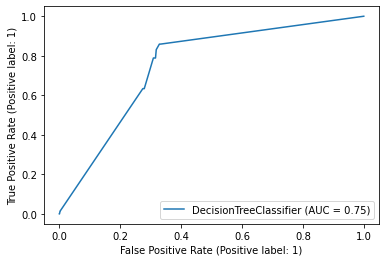

In [108]:
plot_roc_curve(classifier4, X_test, y_test)

In [109]:
import pickle
filename = 'Binary_Classifier_Training_Data.sav'
pickle.dump(classifier4, open(filename, 'wb'))

# Random Forest

In [110]:
X_train = pd.DataFrame(X_train, columns = X1.columns)

In [111]:
X_test = pd.DataFrame(X_test, columns =X1.columns)

In [112]:
'''
X_train.drop(["Received","Applied","logreceived","logapplied","Location_NE",
              "AgeGroup_Old","Age_30-34","Age_65+","Location_PP","Ratio",
              "AgeGroup_MidAge","Is_month_start","Location_O","Age_40-44",
              "Age_55-59","Is_year_end","Is_year_start","Payment_Method_U"], axis = 1, inplace = True)
'''

'\nX_train.drop(["Received","Applied","logreceived","logapplied","Location_NE",\n              "AgeGroup_Old","Age_30-34","Age_65+","Location_PP","Ratio",\n              "AgeGroup_MidAge","Is_month_start","Location_O","Age_40-44",\n              "Age_55-59","Is_year_end","Is_year_start","Payment_Method_U"], axis = 1, inplace = True)\n'

In [113]:
'''
X_test.drop(["Received","Applied","logreceived","logapplied","Location_NE",
              "AgeGroup_Old","Age_30-34","Age_65+","Location_PP","Ratio",
              "AgeGroup_MidAge","Is_month_start","Location_O","Age_40-44",
              "Age_55-59","Is_year_end","Is_year_start","Payment_Method_U"], axis = 1, inplace = True)
'''

'\nX_test.drop(["Received","Applied","logreceived","logapplied","Location_NE",\n              "AgeGroup_Old","Age_30-34","Age_65+","Location_PP","Ratio",\n              "AgeGroup_MidAge","Is_month_start","Location_O","Age_40-44",\n              "Age_55-59","Is_year_end","Is_year_start","Payment_Method_U"], axis = 1, inplace = True)\n'

In [114]:
from sklearn.ensemble import RandomForestClassifier
clf_RFT = RandomForestClassifier(class_weight = {1 : 100, 0:1})
clf_RFT.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [115]:
y_pred_rft=clf_RFT.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_rft, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99      6145
     class 1       0.27      0.17      0.21        71

    accuracy                           0.99      6216
   macro avg       0.63      0.58      0.60      6216
weighted avg       0.98      0.99      0.98      6216



In [116]:
from sklearn.model_selection import GridSearchCV
params={'max_leaf_nodes':list(range(80,100,2)),'min_samples_split':[2,3,4]}
rdc = RandomForestClassifier(random_state = 5, class_weight = {1 : 100, 0:1})
classifier5=GridSearchCV(rdc,params,verbose=1,cv=3, n_jobs = 4)
classifier5.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 100},
                                              random_state=5),
             n_jobs=4,
             param_grid={'max_leaf_nodes': [80, 82, 84, 86, 88, 90, 92, 94, 96,
                                            98],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [117]:
print("tuned hyperparameters :(best parameters) ",classifier5.best_params_)

tuned hyperparameters :(best parameters)  {'max_leaf_nodes': 98, 'min_samples_split': 2}


In [118]:
classifier6=RandomForestClassifier(max_leaf_nodes=98, min_samples_split = 3, random_state=5, class_weight = {1 : 100, 0:1})
classifier6.fit(X_train, y_train)  

RandomForestClassifier(class_weight={0: 1, 1: 100}, max_leaf_nodes=98,
                       min_samples_split=3, random_state=5)

In [119]:
y_pred_rft=classifier6.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_rft, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.65      0.78      6145
     class 1       0.03      0.86      0.05        71

    accuracy                           0.65      6216
   macro avg       0.51      0.75      0.42      6216
weighted avg       0.99      0.65      0.78      6216



In [120]:
y_pred_prob = classifier6.predict_proba(X_test)

In [121]:
y_pred_40_pct_threshold = y_pred_prob[:,1] > 0.8

In [122]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_40_pct_threshold, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.76      0.86      6145
     class 1       0.04      0.77      0.07        71

    accuracy                           0.76      6216
   macro avg       0.52      0.77      0.46      6216
weighted avg       0.99      0.76      0.85      6216



In [123]:
perm = PermutationImportance(classifier6).fit(X_test, y_test)
eli5.show_weights(perm)

In [124]:
fi = pd.DataFrame(data = perm.feature_importances_, index = X_train.columns)

In [125]:
fi.sort_values(by = 0)

0
AgeGroup_MidAge  -0.001416
Location_NE      -0.000933
Dayofyear        -0.000869
Day              -0.000837
AgeGroup_Old     -0.000611
Month            -0.000354
AgeGroup_Teenage  0.000097
logapplied        0.000193
Location_U        0.000901
Location_O        0.001223
Area_BP           0.001416
Location_PP       0.002381
Week              0.003089
Payment_Type_RPU  0.003475
Area_S            0.003861
Area_N            0.005019
Area_Wlg          0.006113
Area_EC           0.006499
Area_O            0.007304
Area_T            0.009524
Area_NL           0.012548
Elapsed           0.013095
Area_C            0.017149
Area_W            0.018468
Year              0.020978

Feature: 0, Score: 0.08666
Feature: 1, Score: 0.07545
Feature: 2, Score: 0.03912
Feature: 3, Score: 0.04231
Feature: 4, Score: 0.09574
Feature: 5, Score: 0.05108
Feature: 6, Score: 0.08567
Feature: 7, Score: 0.04377
Feature: 8, Score: 0.01349
Feature: 9, Score: 0.01166
Feature: 10, Score: 0.00775
Feature: 11, Score: 0.01092
Feature: 12, Score: 0.02642
Feature: 13, Score: 0.04618
Feature: 14, Score: 0.02685
Feature: 15, Score: 0.05582
Feature: 16, Score: 0.04657
Feature: 17, Score: 0.05118
Feature: 18, Score: 0.05424
Feature: 19, Score: 0.02997
Feature: 20, Score: 0.02830
Feature: 21, Score: 0.03372
Feature: 22, Score: 0.01586
Feature: 23, Score: 0.00207
Feature: 24, Score: 0.01920


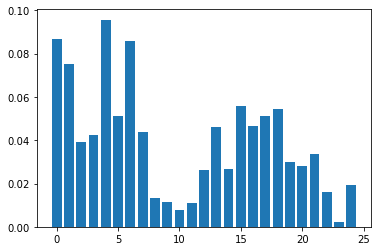

In [126]:
from matplotlib import pyplot
importance = classifier6.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [127]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred_rft)
print(cm)
accuracy_score(y_test, y_pred_rft)*100

[[3966 2179]
 [  10   61]]


64.78442728442728

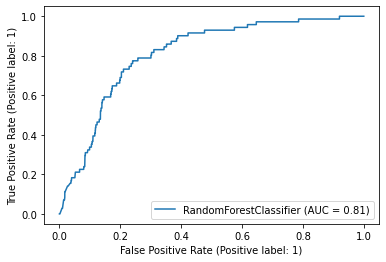

In [128]:
plot_roc_curve(classifier6, X_test, y_test)

In [129]:
import pickle
filename = 'Random_Forest_Classifier_Training_Data.sav'
pickle.dump(classifier6, open(filename, 'wb'))

## Voting Classifier

In [130]:
from sklearn.ensemble import VotingClassifier

##### Hard Voting

In [131]:
estimator=[]
estimator.append(('LR',classifier2))
estimator.append(('DTC',classifier4))
estimator.append(('RFC',classifier6))
vch = VotingClassifier(estimators=estimator, voting='hard')

In [132]:
vch.fit(X_train, y_train.values)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1,
                                                 class_weight={0: 1, 1: 10},
                                                 max_iter=2000,
                                                 random_state=5)),
                             ('DTC',
                              DecisionTreeClassifier(class_weight={0: 1,
                                                                   1: 100},
                                                     max_leaf_nodes=99,
                                                     random_state=5)),
                             ('RFC',
                              RandomForestClassifier(class_weight={0: 1,
                                                                   1: 100},
                                                     max_leaf_nodes=98,
                                                     min_samples_split=3,
                                         

In [133]:
y_pred_vote = vch.predict(X_test)

In [134]:
print(classification_report(y_test, y_pred_vote))

              precision    recall  f1-score   support

           0       1.00      0.63      0.78      6145
           1       0.03      0.87      0.05        71

    accuracy                           0.64      6216
   macro avg       0.51      0.75      0.41      6216
weighted avg       0.99      0.64      0.77      6216



##### Soft Voting

In [135]:
estimator=[]
estimator.append(('LR',classifier2))
estimator.append(('DTC',classifier4))
estimator.append(('RFC',classifier6))
vcs = VotingClassifier(estimators=estimator, voting='soft')

In [136]:
vcs.fit(X_train, y_train.values)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1,
                                                 class_weight={0: 1, 1: 10},
                                                 max_iter=2000,
                                                 random_state=5)),
                             ('DTC',
                              DecisionTreeClassifier(class_weight={0: 1,
                                                                   1: 100},
                                                     max_leaf_nodes=99,
                                                     random_state=5)),
                             ('RFC',
                              RandomForestClassifier(class_weight={0: 1,
                                                                   1: 100},
                                                     max_leaf_nodes=98,
                                                     min_samples_split=3,
                                         

In [137]:
y_pred_vote2 = vcs.predict(X_test)

In [138]:
print(classification_report(y_test, y_pred_vote2))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78      6145
           1       0.03      0.86      0.05        71

    accuracy                           0.65      6216
   macro avg       0.51      0.75      0.42      6216
weighted avg       0.99      0.65      0.77      6216



Either of the hard voting or soft voting can be saved as the diiference is not noticible. We are saving soft voting as recall and accuracy is slightly better than hard voting.

In [139]:
import pickle
filename = 'Voting_Classifier_Training_Data.sav'
pickle.dump(vcs, open(filename, 'wb'))

# The End.